In [4]:
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

from multilevel_cutpoint_model import CutpointModel
from discrete_ci import discrete_ci

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from node import Node

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Make Moons

In [6]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

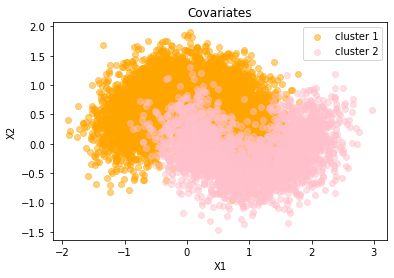

In [7]:
# y_moon indicates if the data will be in the first bucket or the second
N = 10000
X, y_moon = make_moons(n_samples = N, noise=0.3, random_state=1978)

# drop 1/2 of the 1 moons 
# want y_moon plot to look even and censoring to look even
# try higher value of sigmoid if it can't find the cutpoint
combined = np.append(X, y_moon[:,None], 1)
combined_sorted = combined[combined[:, -1].argsort()]
combined_sorted = combined_sorted[:7500,:]
np.random.shuffle(combined_sorted)
X = combined_sorted[:,:-1]
y_moon = combined_sorted[:,-1]

t_min = 0
t_boundary = 67
t_max = 100
t = np.zeros(len(y_moon))

s = np.random.binomial(1, 0.5, len(y_moon))
# s = np.random.binomial(1, 1, len(y_moon))

for ii in range(0, len(y_moon)):
    if y_moon[ii] == 0:
        t[ii] = np.random.uniform(t_min, t_boundary)
    elif y_moon[ii] == 1:
        
        t[ii] = np.random.uniform(t_boundary, t_max)
        
# t = t[1:int(N * 3/4)]
# s = s[1:int(N * 3/4)]
# y_moon = y_moon[1:int(N * 3/4)]
# X = X[1:int(N * 3/4), :]
plt.scatter(X[y_moon==0, 0], X[y_moon==0, 1], c="orange", alpha=0.5, label="cluster 1")
plt.scatter(X[y_moon==1, 0], X[y_moon==1, 1], c="pink", alpha=0.5, label="cluster 2")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Covariates')


plt.show()

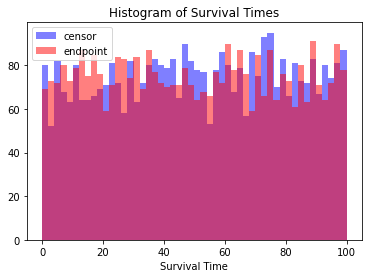

In [8]:
plt.hist(t[s==0], bins=50, alpha = 0.5, color = "blue", label="censor")
plt.hist(t[s==1], bins=50, alpha = 0.5, color = "red", label="endpoint")
# plt.axvline(t_boundary, color="black")
plt.xlabel('Survival Time')
plt.ylabel('')
plt.title('Histogram of Survival Times')
plt.legend()
plt.show()

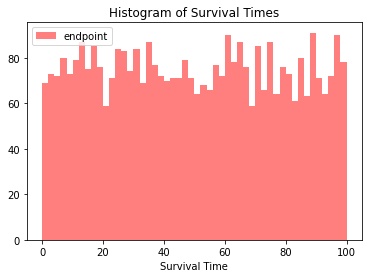

In [9]:
# plt.hist(t[s==0], bins=50, alpha = 0.5, color = "blue", label="censor")
plt.hist(t[s==1], bins=50, alpha = 0.5, color = "red", label="endpoint")
# plt.axvline(t_boundary, color="black")
plt.xlabel('Survival Time')
plt.ylabel('')
plt.title('Histogram of Survival Times')
plt.legend()
plt.show()

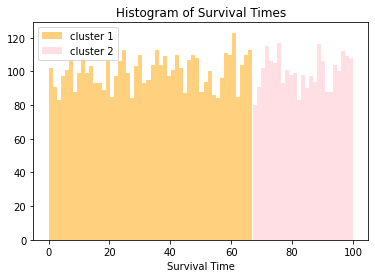

In [10]:
plt.hist(t[y_moon==0], bins=50, alpha = 0.5, color = "orange", label="cluster 1")
plt.hist(t[y_moon==1], bins=25, alpha = 0.5, color = "pink", label="cluster 2")
# plt.axvline(t_boundary, color="black")
plt.xlabel('Survival Time')
plt.ylabel('')
plt.title('Histogram of Survival Times')
plt.legend()
plt.show()

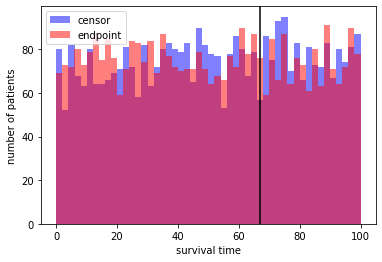

In [11]:
plt.hist(t[s==0], bins=50, alpha = 0.5, color = "blue", label="censor")
plt.hist(t[s==1], bins=50, alpha = 0.5, color = "red", label="endpoint")
plt.axvline(t_boundary, color="black")
plt.xlabel('survival time')
plt.ylabel('number of patients')
plt.legend()
plt.show()

In [12]:
X_train, X_test, \
t_train, t_test,\
s_train, s_test = train_test_split(
    X, t, s, test_size=0.2, random_state=1978
)

In [35]:
from multilevel_cutpoint_model import CutpointModel

m = CutpointModel(X_train, t_train, s_train, sigmoid_temperature = 0.001, depth = 0, iterations = 250, prior_strength = 0.75)
m.train()

1
loss 0.36034107208251953
2
loss 0.3335294723510742
3
loss 0.3100007474422455
4
loss 0.289736270904541


KeyboardInterrupt: 

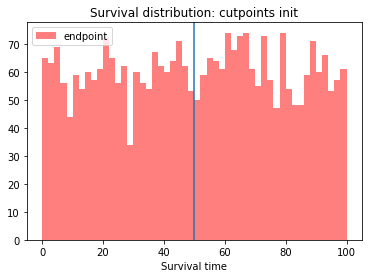

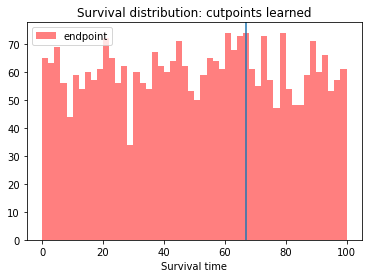

In [25]:
m.plot_result(t_train[s_train==1],label_true="endpoint")

In [26]:
discrete_ci(m.predict(X_train), m.cutpoints, t_train, s_train, t_train)

0.9720778489442551

In [27]:
discrete_ci(m.predict(X_test), m.cutpoints, t_test, s_test, t_train)

0.9697232645403377

In [28]:
discrete_ci(m.predict(X_test), m.cutpoint0, t_test, s_test, t_train)

0.8182941688424717

### using quantile initialization

In [32]:
from multilevel_cutpoint_model import CutpointModel


In [16]:
from multilevel_cutpoint_model import CutpointModel

m = CutpointModel(X_train, t_train, s_train, sigmoid_temperature = 0.001, depth = 0, iterations = 250, prior_strength = 0.75, init_method="quantile")
m.train()

[0.  0.5 1. ]
1
loss 0.48841243982315063
2
loss 0.4370221495628357
3
loss 0.3958733081817627
4
loss 0.36201536655426025
5
loss 0.33458101749420166
6
loss 0.31246069073677063
7
loss 0.29379940032958984
8
loss 0.2774200439453125
9
loss 0.26336878538131714
10
loss 0.2508939206600189
11
loss 0.23872613906860352
12
loss 0.22752223908901215
13
loss 0.21676288545131683
14
loss 0.20664671063423157
15
loss 0.19707269966602325
16
loss 0.186452716588974
17
loss 0.1773781031370163
18
loss 0.1685900241136551
19
loss 0.15909747779369354
20
loss 0.14837302267551422
21
loss 0.13438455760478973
22
loss 0.121452197432518
23
loss 0.10529084503650665
24
loss 0.10431616008281708
25
loss 0.10366055369377136
26
loss 0.09978929162025452
27
loss 0.09364774823188782
28
loss 0.08630666136741638
29
loss 0.07959003746509552
30
loss 0.07903037965297699
31
loss 0.08287915587425232
32
loss 0.0806448757648468
33
loss 0.07448622584342957
34
loss 0.07136964797973633
35
loss 0.07163195312023163
36
loss 0.0715498030185699

In [18]:
m.cutpoint0

tensor([0.5025], dtype=torch.float64)

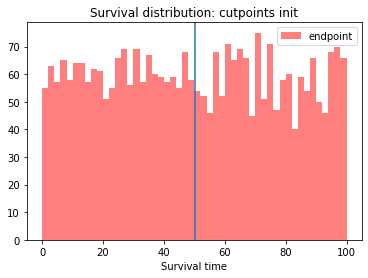

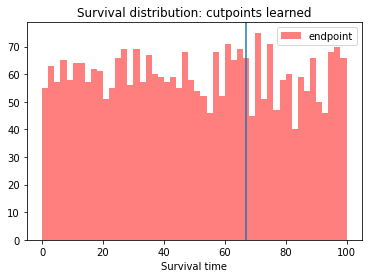

In [17]:
m.plot_result(t_train[s_train==1],label_true="endpoint")

## Multi-modal

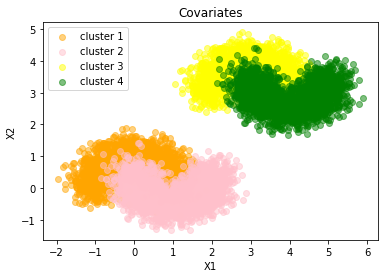

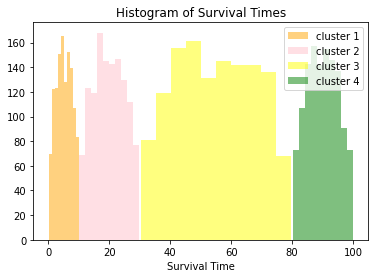

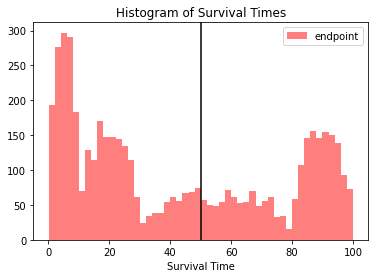

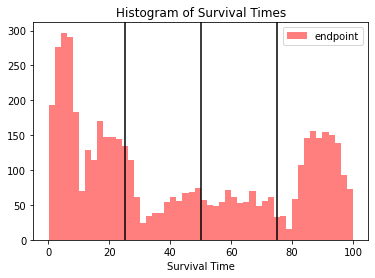

In [19]:
# preprocess dataset, split into training and test part
X, y = make_moons(n_samples = 5000, noise=0.3, random_state=0)
# make 2 more classes and shift covariates
X2, y2 = make_moons(n_samples = 5000, noise=0.3, random_state=0)
X2 = X2 + 3
y2 = y2 + 2

X = np.concatenate((X,X2))
y = np.concatenate((y, y2))

plt.scatter(X[y==0, 0], X[y==0, 1], c="orange", alpha=0.5, label="cluster 1")
plt.scatter(X[y==1, 0], X[y==1, 1], c="pink", alpha=0.5, label="cluster 2")
plt.scatter(X[y==2, 0], X[y==2, 1], c="yellow", alpha=0.5, label="cluster 3")
plt.scatter(X[y==3, 0], X[y==3, 1], c= "green", alpha=0.5, label="cluster 4")

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Covariates')
plt.show()


s = np.random.binomial(1, 0.5, len(y))

t_min = 0
t_boundaries = [10, 30, 80]
t_max = 100
t = np.zeros(len(y))

for ii in range(0, len(y)):
    if s[ii] == 1:
        t[ii] = np.random.uniform(t_min, t_max)
    else:
        if y[ii] == 0:
            t[ii] = (np.random.beta(1.5,1.5) * (t_boundaries[0] - t_min)) + t_min
        elif y[ii] == 1:
            t[ii] = (np.random.beta(1.5,1.5) * (t_boundaries[1] - t_boundaries[0])) + t_boundaries[0]
        elif y[ii] == 2:
            t[ii] = (np.random.beta(1.5,1.5) * (t_boundaries[2] - t_boundaries[1])) + t_boundaries[1]
        elif y[ii] == 3:
            t[ii] = (np.random.beta(1.5,1.5) * (t_max - t_boundaries[2])) + t_boundaries[2]

        
X_train, X_test, \
t_train, t_test,\
s_train, s_test = train_test_split(
    X, t, s, test_size=0.2, random_state=1978
)

plt.hist(t[np.logical_and(y==0, s==0)], bins=10, alpha = 0.5, color = "orange", label="cluster 1")
plt.hist(t[np.logical_and(y==1, s==0)], bins=10, alpha = 0.5, color = "pink", label="cluster 2")
plt.hist(t[np.logical_and(y==2, s==0)], bins=10, alpha = 0.5, color = "yellow", label="cluster 3")
plt.hist(t[np.logical_and(y==3, s==0)], bins=10, alpha = 0.5, color = "green", label="cluster 4")

plt.xlabel('Survival Time')
plt.ylabel('')
plt.title('Histogram of Survival Times')


# for bound in t_boundaries:
#     plt.axvline(bound, color="black")

plt.legend(loc='upper right')
plt.show()

plt.hist(t[s==0], bins=50, alpha = 0.5, color = "red", label="endpoint")
plt.xlabel('Survival Time')
plt.ylabel('')
plt.title('Histogram of Survival Times')


plt.axvline(50, color="black")
plt.legend()

plt.show()

plt.hist(t[s==0], bins=50, alpha = 0.5, color = "red", label="endpoint")
plt.xlabel('Survival Time')
plt.ylabel('')
plt.title('Histogram of Survival Times')

plt.axvline(25, color="black")
plt.axvline(50, color="black")
plt.axvline(75, color="black")
plt.legend()

plt.show()

In [20]:
from multilevel_cutpoint_model import CutpointModel

m = CutpointModel(X_train, t_train, s_train,
                  sigmoid_temperature = 0.001, depth =1, iterations = 250, 
                  prior_bool = True, prior_strength = 0.95)
m.train()

1
loss 0.10330444574356079
2
loss -0.17360752820968628
3
loss -0.3032912611961365
4
loss -0.3200915455818176
5
loss -0.29501014947891235
6
loss -0.27456188201904297
7
loss -0.2707256078720093
8
loss -0.280794620513916
9
loss -0.297730028629303
10
loss -0.3161643147468567
11
loss -0.3331190049648285
12
loss -0.3471795618534088
13
loss -0.35719141364097595
14
loss -0.3636413812637329
15
loss -0.365630179643631
16
loss -0.3635682463645935
17
loss -0.35995596647262573
18
loss -0.3570719361305237
19
loss -0.35677769780158997
20
loss -0.35967743396759033
21
loss -0.36381712555885315
22
loss -0.36804884672164917
23
loss -0.3718617558479309
24
loss -0.3742654621601105
25
loss -0.37568238377571106
26
loss -0.3763749301433563
27
loss -0.37680864334106445
28
loss -0.3773636221885681
29
loss -0.37750959396362305
30
loss -0.3771641254425049
31
loss -0.3772202432155609
32
loss -0.37787336111068726
33
loss -0.3790181279182434
34
loss -0.3806406259536743
35
loss -0.38220372796058655
36
loss -0.3829273

In [21]:
m.cutpoints[2].item()

0.7738159894943237

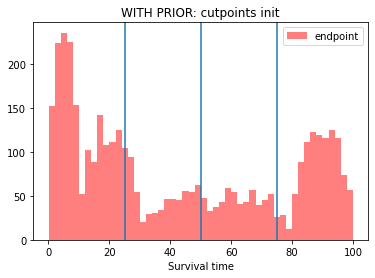

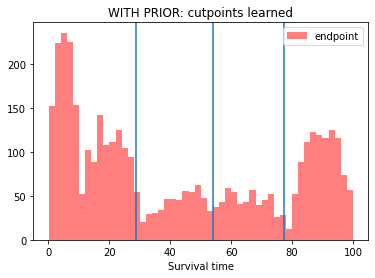

In [22]:
m.plot_result(t_train[s_train==0], title="WITH PRIOR")

In [23]:
discrete_ci(m.predict(X_test), m.cutpoints, t_test, s_test, t_train)

0.6082170932088184

In [24]:
discrete_ci(m.predict(X_test), m.cutpoint0, t_test, s_test, t_train)

0.5997470667379541

In [25]:
from multilevel_cutpoint_model import CutpointModel

m = CutpointModel(X_train, t_train, s_train,
                  sigmoid_temperature = 0.001, depth =1, iterations = 250, 
                  prior_bool = False, prior_strength = 0.95)
m.train()

1
loss -0.5018759965896606
2
loss -0.6081046462059021
3
loss -0.6288225650787354
4
loss -0.6305725574493408
5
loss -0.6440762281417847
6
loss -0.6675938367843628
7
loss -0.6899706721305847
8
loss -0.7057287096977234
9
loss -0.7144895792007446
10
loss -0.7161471843719482
11
loss -0.7166626453399658
12
loss -0.7206181883811951
13
loss -0.727881908416748
14
loss -0.7363572120666504
15
loss -0.7419643402099609
16
loss -0.7445565462112427
17
loss -0.746049165725708
18
loss -0.7480947971343994
19
loss -0.7496222257614136
20
loss -0.751339316368103
21
loss -0.7533591985702515
22
loss -0.7563204765319824
23
loss -0.760028600692749
24
loss -0.7636568546295166
25
loss -0.7667009830474854
26
loss -0.7677655816078186
27
loss -0.7698589563369751
28
loss -0.7726023197174072
29
loss -0.7764725685119629
30
loss -0.7803023457527161
31
loss -0.7830021381378174
32
loss -0.7851787209510803
33
loss -0.7884448766708374
34
loss -0.7917096614837646
35
loss -0.794697642326355
36
loss -0.7966167330741882
37
los

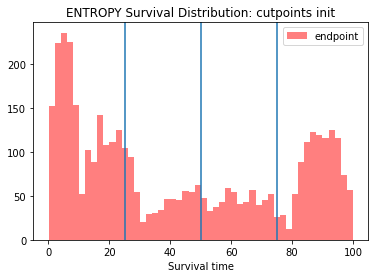

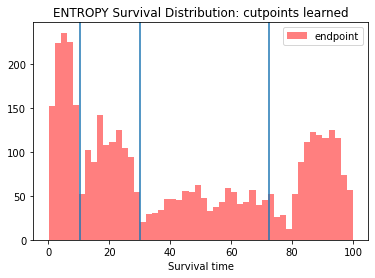

In [29]:
m.plot_result(t_train[s_train==0], title="ENTROPY Survival Distribution")

In [30]:
discrete_ci(m.predict(X_train), m.cutpoints, t_train, s_train, t_train)

0.6208688737715834

In [31]:
discrete_ci(m.predict(X_test), m.cutpoints, t_test, s_test, t_train)

0.5929688236503204

In [32]:
discrete_ci(m.predict(X_test), m.cutpoint0, t_test, s_test, t_train)

0.5970884767013508

1
loss 0.8368526697158813
2
loss 0.5221819281578064
3
loss 0.27353543043136597
4
loss 0.08352881669998169
5
loss -0.05608999729156494
6
loss -0.1534736156463623
7
loss -0.2135109007358551
8
loss -0.24566975235939026
9
loss -0.25580936670303345
10
loss -0.25291773676872253
11
loss -0.2456456422805786
12
loss -0.23938509821891785
13
loss -0.2366757094860077
14
loss -0.23772728443145752
15
loss -0.24278056621551514
16
loss -0.2494550347328186
17
loss -0.25735709071159363
18
loss -0.26623961329460144
19
loss -0.2739887833595276
20
loss -0.2828056514263153
21
loss -0.2903907597064972
22
loss -0.2995365560054779
23
loss -0.3075295090675354
24
loss -0.3155059516429901
25
loss -0.32198044657707214
26
loss -0.3260062038898468
27
loss -0.3277093768119812
28
loss -0.3300742506980896
29
loss -0.33312469720840454
30
loss -0.3369058668613434
31
loss -0.34216436743736267
32
loss -0.3469192683696747
33
loss -0.3510792553424835
34
loss -0.3542647063732147
35
loss -0.3567304015159607
36
loss -0.35943049

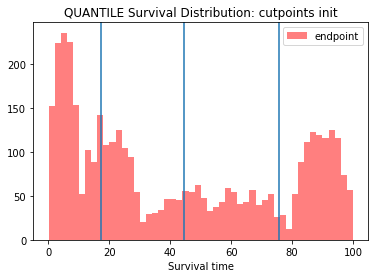

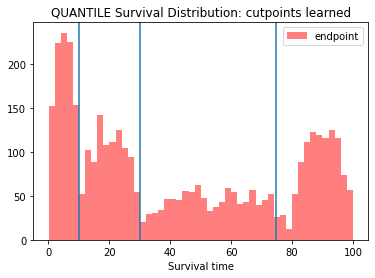

In [41]:
from multilevel_cutpoint_model import CutpointModel

m = CutpointModel(X_train, t_train, s_train, sigmoid_temperature = 0.001, depth = 1, iterations = 250, prior_bool = False, prior_strength = 0.75, init_method="quantile")
m.train()
m.plot_result(t_train[s_train==0], title="QUANTILE Survival Distribution")

In [42]:
m.cutpoint0

tensor([0.4433, 0.1714, 0.7577], dtype=torch.float64)

# NACD Data

There are 51 features
There are 2402 patients


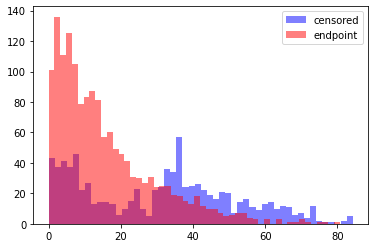

In [27]:
df= pd.read_csv('http://pssp.srv.ualberta.ca/system/predictors/datasets/000/000/032/original/All_Data_updated_may2011_CLEANED.csv?1350302245')
t = np.array(df["SURVIVAL"])
# make times positive
t += abs(min(t))

# censored: 1 is that they were censored 0 they experienced the event
s = np.array(1 - df["CENSORED"])

numrc_cols = df.nunique() > 2
df.loc[:, numrc_cols] = (df.loc[:, numrc_cols] - df.loc[:, numrc_cols].mean()) / df.loc[:, numrc_cols].std()

OUTCOMES = ['SURVIVAL', 'CENSORED']
X = df.drop(OUTCOMES, axis=1).sample(frac=1, random_state=2021)
X = X.values

print('There are', X.shape[1], 'features')
print(f"There are {X.shape[0]} patients")

plt.hist(t[s==0], bins=50, alpha = 0.5, color = "blue", label="censored")
plt.hist(t[s==1], bins=50, alpha = 0.5, color = "red", label="endpoint")
plt.legend()
plt.show()

In [28]:
m = CutpointModel(X, t, s, sigmoid_temperature = 0.001, depth = 1, iterations = 500, prior_strength = 0.75)
m.train()


1
loss 0.22098901867866516
2
loss 0.11078071594238281
3
loss 0.02181015908718109
4
loss -0.048699796199798584
5
loss -0.10414813458919525
6
loss -0.14093847572803497
7
loss -0.16936947405338287
8
loss -0.19129739701747894
9
loss -0.2055165022611618
10
loss -0.21618007123470306
11
loss -0.23589558899402618
12
loss -0.25429731607437134
13
loss -0.27370142936706543
14
loss -0.28200212121009827
15
loss -0.3020581007003784
16
loss -0.3125225901603699
17
loss -0.329468309879303
18
loss -0.33852189779281616
19
loss -0.3460158705711365
20
loss -0.3520442545413971
21
loss -0.36084073781967163
22
loss -0.36860284209251404
23
loss -0.3753739297389984
24
loss -0.3833022713661194
25
loss -0.39161914587020874
26
loss -0.4003831148147583
27
loss -0.41163820028305054
28
loss -0.4134579300880432
29
loss -0.41519299149513245
30
loss -0.41803985834121704
31
loss -0.4276285767555237
32
loss -0.42825233936309814
33
loss -0.4294091463088989
34
loss -0.4332559108734131
35
loss -0.4380951523780823
36
loss -0.

287
loss -0.9020653367042542
288
loss -0.902633547782898
289
loss -0.9031253457069397
290
loss -0.9036474227905273
291
loss -0.9042559862136841
292
loss -0.9050201177597046
293
loss -0.9056699872016907
294
loss -0.9062663912773132
295
loss -0.9067825078964233
296
loss -0.9073355793952942
297
loss -0.907855749130249
298
loss -0.9084210395812988
299
loss -0.9089967012405396
300
loss -0.9095908403396606
301
loss -0.9101446270942688
302
loss -0.9106252789497375
303
loss -0.9111291170120239
304
loss -0.9116035103797913
305
loss -0.9121544361114502
306
loss -0.9126592874526978
307
loss -0.913173258304596
308
loss -0.9136705994606018
309
loss -0.914175271987915
310
loss -0.9146668910980225
311
loss -0.9151317477226257
312
loss -0.9156273603439331
313
loss -0.916069507598877
314
loss -0.9165223240852356
315
loss -0.9170167446136475
316
loss -0.9174739122390747
317
loss -0.9179295301437378
318
loss -0.9183709025382996
319
loss -0.9187904000282288
320
loss -0.9192590713500977
321
loss -0.9196506

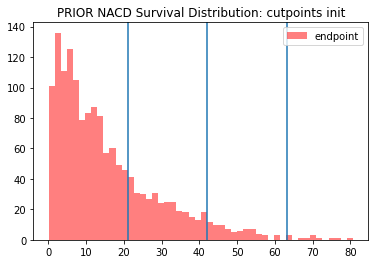

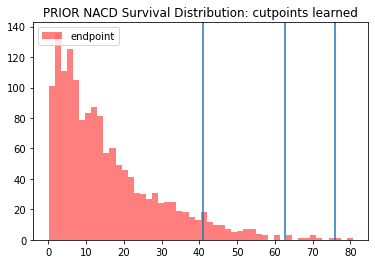

learned_cutpoints: 0.993781943052279
init_cutpoints: 0.6620478689106649


In [35]:
m.plot_result(t[s==1],
              title="PRIOR NACD Survival Distribution",
              label_true = "endpoint")
print(f"learned_cutpoints: {discrete_ci(m.predict(X), m.cutpoints, t, s, t)}\ninit_cutpoints: {discrete_ci(m.predict(X), m.cutpoint0, t, s, t)}")

In [37]:
m = CutpointModel(X, t, s, sigmoid_temperature = 0.001, depth = 1, iterations = 500, prior_bool = False, prior_strength = 0.75)
m.train()


1
loss 0.3636755347251892
2
loss 0.24450433254241943
3
loss 0.16868066787719727
4
loss 0.13226071000099182
5
loss 0.12128779292106628
6
loss 0.12633568048477173
7
loss 0.1292564570903778
8
loss 0.1239067018032074
9
loss 0.11270153522491455
10
loss 0.10142168402671814
11
loss 0.09495183825492859
12
loss 0.09037211537361145
13
loss 0.08838674426078796
14
loss 0.08687734603881836
15
loss 0.08477887511253357
16
loss 0.08197388052940369
17
loss 0.07858091592788696
18
loss 0.07481852173805237
19
loss 0.07112449407577515
20
loss 0.0685572624206543
21
loss 0.0657915472984314
22
loss 0.063651442527771
23
loss 0.06161239743232727
24
loss 0.059159547090530396
25
loss 0.0560702383518219
26
loss 0.05267176032066345
27
loss 0.04950833320617676
28
loss 0.04668053984642029
29
loss 0.04441574215888977
30
loss 0.042176783084869385
31
loss 0.03982225060462952
32
loss 0.03686040639877319
33
loss 0.03303074836730957
34
loss 0.029416769742965698
35
loss 0.02690163254737854
36
loss 0.02433869242668152
37
los

286
loss -0.7148362994194031
287
loss -0.715734601020813
288
loss -0.716487467288971
289
loss -0.7174296379089355
290
loss -0.7184978127479553
291
loss -0.71966952085495
292
loss -0.7205929756164551
293
loss -0.721449077129364
294
loss -0.722245991230011
295
loss -0.7228782773017883
296
loss -0.7232303619384766
297
loss -0.7232093214988708
298
loss -0.7239144444465637
299
loss -0.725225031375885
300
loss -0.7267569303512573
301
loss -0.7278673648834229
302
loss -0.7286601066589355
303
loss -0.7292138338088989
304
loss -0.7298306822776794
305
loss -0.730467677116394
306
loss -0.7313048243522644
307
loss -0.7322820425033569
308
loss -0.7336294651031494
309
loss -0.7343471050262451
310
loss -0.7347918748855591
311
loss -0.7355175614356995
312
loss -0.7365142107009888
313
loss -0.7375197410583496
314
loss -0.73838210105896
315
loss -0.739109456539154
316
loss -0.7398295402526855
317
loss -0.7404932975769043
318
loss -0.741320013999939
319
loss -0.7421376705169678
320
loss -0.74284172058105

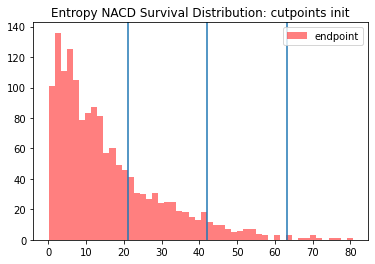

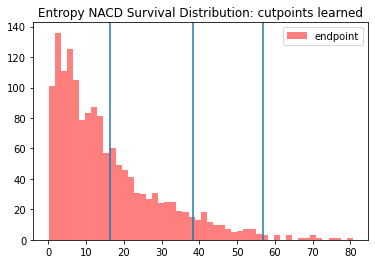

learned_cutpoints: 0.9466072350926865
init_cutpoints: 0.8754088586458635


In [38]:
m.plot_result(t[s==1],
              title="Entropy NACD Survival Distribution",
              label_true = "endpoint")
print(f"learned_cutpoints: {discrete_ci(m.predict(X), m.cutpoints, t, s, t)}\ninit_cutpoints: {discrete_ci(m.predict(X), m.cutpoint0, t, s, t)}")

# Support dataset

There are 61 features
There are 9105 patients


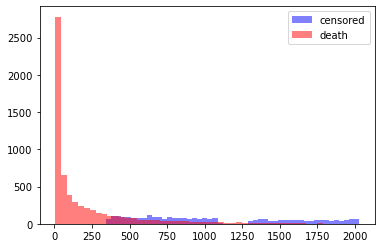

In [61]:
FILL_VALUES = {
    'alb': 3.5,
    'pafi': 333.3,
    'bili': 1.01,
    'crea': 1.01,
    'bun': 6.51,
    'wblc': 9.,
    'urine': 2502.
}

TO_DROP = ['aps', 'sps', 'surv2m', 'surv6m', 'prg2m', 'prg6m', 'dnr', 'dnrday']
TO_DROP = TO_DROP + ['sfdm2', 'hospdead']

# load, drop columns, fill using specified fill values
df = pd.read_csv('datasets/support2.csv').drop(TO_DROP,axis=1).fillna(value=FILL_VALUES)

# get dummies for categorical vars
df = pd.get_dummies(df, dummy_na=True)

# fill remaining values to the median

df = df.fillna(df.median())

# standardize numeric columns

numrc_cols = df.dtypes == 'float64'
df.loc[:, numrc_cols] = (df.loc[:, numrc_cols] - df.loc[:, numrc_cols].mean()) / df.loc[:, numrc_cols].std()

OUTCOMES = ['death', 'd.time']
X = df.drop(OUTCOMES, axis=1).sample(frac=1, random_state=2021)
X = X.values

t = np.array(df["d.time"])
s = np.array(df['death'])

print('There are', X.shape[1], 'features')
print(f'There are {X.shape[0]} patients')

plt.hist(t[s==0], bins=50, alpha = 0.5, color = "blue", label="censored")
plt.hist(t[s==1], bins=50, alpha = 0.5, color = "red", label="death")
plt.legend()
plt.show()

In [68]:
from multilevel_cutpoint_model import CutpointModel

m = CutpointModel(X, t, s, sigmoid_temperature = 0.001, depth = 1, iterations = 1000, prior_bool = True, prior_strength = 0.75)
m.train()


tensor([[0.4377, 0.5623],
        [0.4171, 0.5829],
        [0.3833, 0.6167],
        ...,
        [0.2715, 0.7285],
        [0.4505, 0.5495],
        [0.3924, 0.6076]], grad_fn=<SoftmaxBackward0>)
tensor([[0.0924, 0.0956, 0.5874, 0.2247],
        [0.2082, 0.2401, 0.2821, 0.2696],
        [0.1102, 0.0756, 0.6203, 0.1939],
        ...,
        [0.1490, 0.0992, 0.5275, 0.2244],
        [0.1665, 0.2461, 0.3025, 0.2849],
        [0.1221, 0.1053, 0.5307, 0.2419]], grad_fn=<SoftmaxBackward0>)
1
loss nan
tensor([[0.7633, 0.2367],
        [0.5375, 0.4625],
        [0.7178, 0.2822],
        ...,
        [0.6280, 0.3720],
        [0.6439, 0.3561],
        [0.6511, 0.3489]], grad_fn=<SoftmaxBackward0>)


ValueError: Expected value argument (Tensor of shape ()) to be within the support (Interval(lower_bound=0.0, upper_bound=1.0)) of the distribution Beta(), but found invalid values:
nan

In [ ]:
m.plot_result(t[s==1],
              t[s==0],
              title="Support Survival Distribution",
              label_true = "endpoint",
              label_false = "censored"
             )